# [Title Here - last thing to update]

### INTRODUCTION [copy from report - no one needs to spend time on this]

- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and describe the dataset that was used to answer the question

- we should make sure to explain our choice of predictor variables

### METHODS & RESULTS

- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis. (AJ Dreher)

- these methods should be added to the report, alongside the relevant code
- we should mention why family relationships and health can be used as quantitative variables because they are measured on a self-report scale, and we are assuming equal distances between the different intervals in the scale

- your report should include code which: (Charul)
 - loads data from the original source on the web **(not from /data folder)**
 - wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
 - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
 - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
 - performs the data analysis
 - creates a visualization of the analysis 


*note: all tables and figure should have a figure/table number and a legend*

In [41]:
library(tidyverse)
library(repr)
library(caret)
library(ggplot2)
library(tidymodels)
library(forcats)
library(GGally)

In [6]:
download.file ("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip", "student.zip")

unzip("student.zip")

student_data <- read_delim("student-por.csv", delim = ";")

glimpse (student_data)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



Rows: 649
Columns: 33
$ school     <chr> "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP"…
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F"…
$ age        <dbl> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15…
$ address    <chr> "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U"…
$ famsize    <chr> "GT3", "GT3", "LE3", "GT3", "GT3", "LE3", "LE3", "GT3", "L…
$ Pstatus    <chr> "A", "T", "T", "T", "T", "T", "T", "A", "A", "T", "T", "T"…
$ Medu       <dbl> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4…
$ Fedu       <dbl> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3…
$ Mjob       <chr> "at_home", "at_home", "at_home", "health", "other", "servi…
$ Fjob       <chr> "teacher", "other", "other", "services", "other", "other",…
$ reason     <chr> "course", "course", "other", "home", "home", "reputation",…
$ guardian   <chr> "mother", "father", "mother", "mother", "father", "mother"…
$ traveltime <dbl> 2, 1, 1, 1,

In [8]:
student_data <- student_data %>% 
            select (G3, absences, famrel, health)

student_data %>% head (10)

G3,absences,famrel,health
<dbl>,<dbl>,<dbl>,<dbl>
11,4,4,3
11,2,5,3
12,6,4,3
14,0,3,5
13,0,4,5
13,6,5,5
13,0,4,3
13,2,4,1
17,0,4,1


In [9]:
set.seed (1)

student_split <- initial_split(student_data, prop = 0.7, strata = G3)
student_train <- training(student_split)
student_test <- testing(student_split)

In [10]:
# In this table, we summarized the mean, minimum and maximum final grades of students on the basis of number of absences

absences_summary <- group_by (student_train, absences) %>% 
            summarize (
                min_final_grade = min(G3), 
                max_final_grade = max (G3), 
                mean_final_grade = mean (G3)
                )
absences_summary

`summarise()` ungrouping output (override with `.groups` argument)



absences,min_final_grade,max_final_grade,mean_final_grade
<dbl>,<dbl>,<dbl>,<dbl>
0,0,19,12.142012
1,10,16,12.500000
2,7,18,12.306667
3,7,17,11.000000
4,6,19,11.865672
5,8,17,11.750000
6,8,17,12.303030
7,8,16,13.000000
8,7,15,11.586207


In [12]:
# In this table, we summarized the mean, minimum and maximum final grades of students on the basis of quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

famrel_summary <- group_by (student_train, famrel) %>% 
            summarize (
                min_final_grade = min(G3), 
                max_final_grade = max (G3), 
                mean_final_grade = mean (G3)
                )
famrel_summary

`summarise()` ungrouping output (override with `.groups` argument)



famrel,min_final_grade,max_final_grade,mean_final_grade
<dbl>,<dbl>,<dbl>,<dbl>
1,0,15,9.090909
2,0,15,10.352941
3,0,19,11.573333
4,0,18,12.432432
5,0,18,11.770992


In [13]:
# In this table, we summarized the mean, minimum and maximum final grades of students on the basis of current health status (numeric: from 1 - very bad to 5 - very good)

health_summary <- group_by (student_train, health) %>% 
            summarize (
                min_final_grade = min(G3), 
                max_final_grade = max (G3), 
                mean_final_grade = mean (G3)
                )
health_summary

`summarise()` ungrouping output (override with `.groups` argument)



health,min_final_grade,max_final_grade,mean_final_grade
<dbl>,<dbl>,<dbl>,<dbl>
1,0,18,12.66129
2,0,19,12.44828
3,0,19,11.82143
4,0,18,12.08108
5,0,18,11.52809


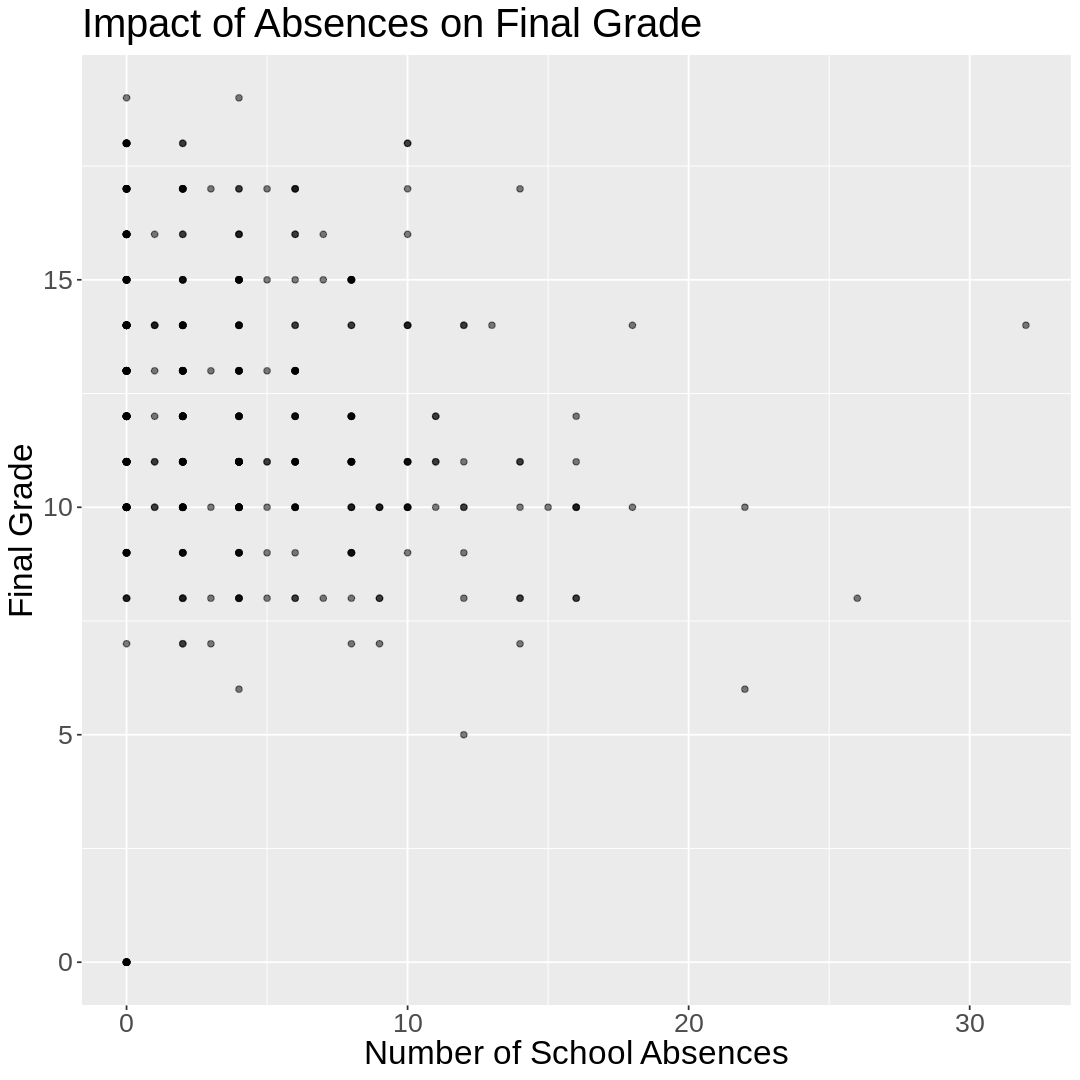

In [30]:
options(repr.plot.width = 9, repr.plot.height = 9)

absences_plot <- ggplot(student_train, aes(x = absences, y = G3)) + 
  geom_point(alpha = 0.5) + 
  xlab("Number of School Absences") +
  ylab("Final Grade") + 
    labs (title = "Impact of Absences on Final Grade") +
theme(text = element_text(size=20)) 

absences_plot

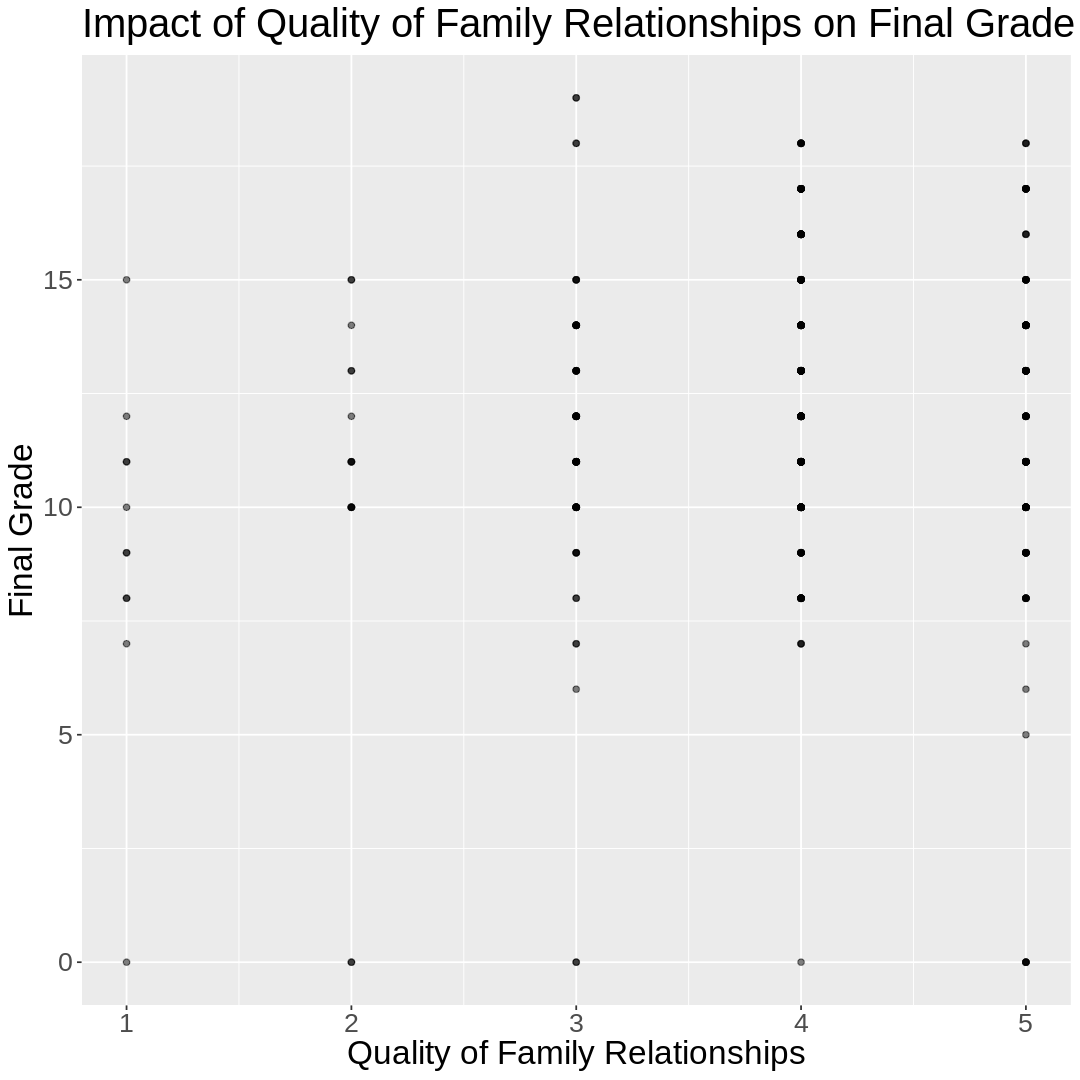

In [31]:
famrel_plot <- ggplot(student_train, aes(x = famrel, y = G3)) + 
  geom_point(alpha = 0.5) + 
  xlab("Quality of Family Relationships") +
  ylab("Final Grade") + 
    labs (title = "Impact of Quality of Family Relationships on Final Grade") +
theme(text = element_text(size=20)) 

famrel_plot

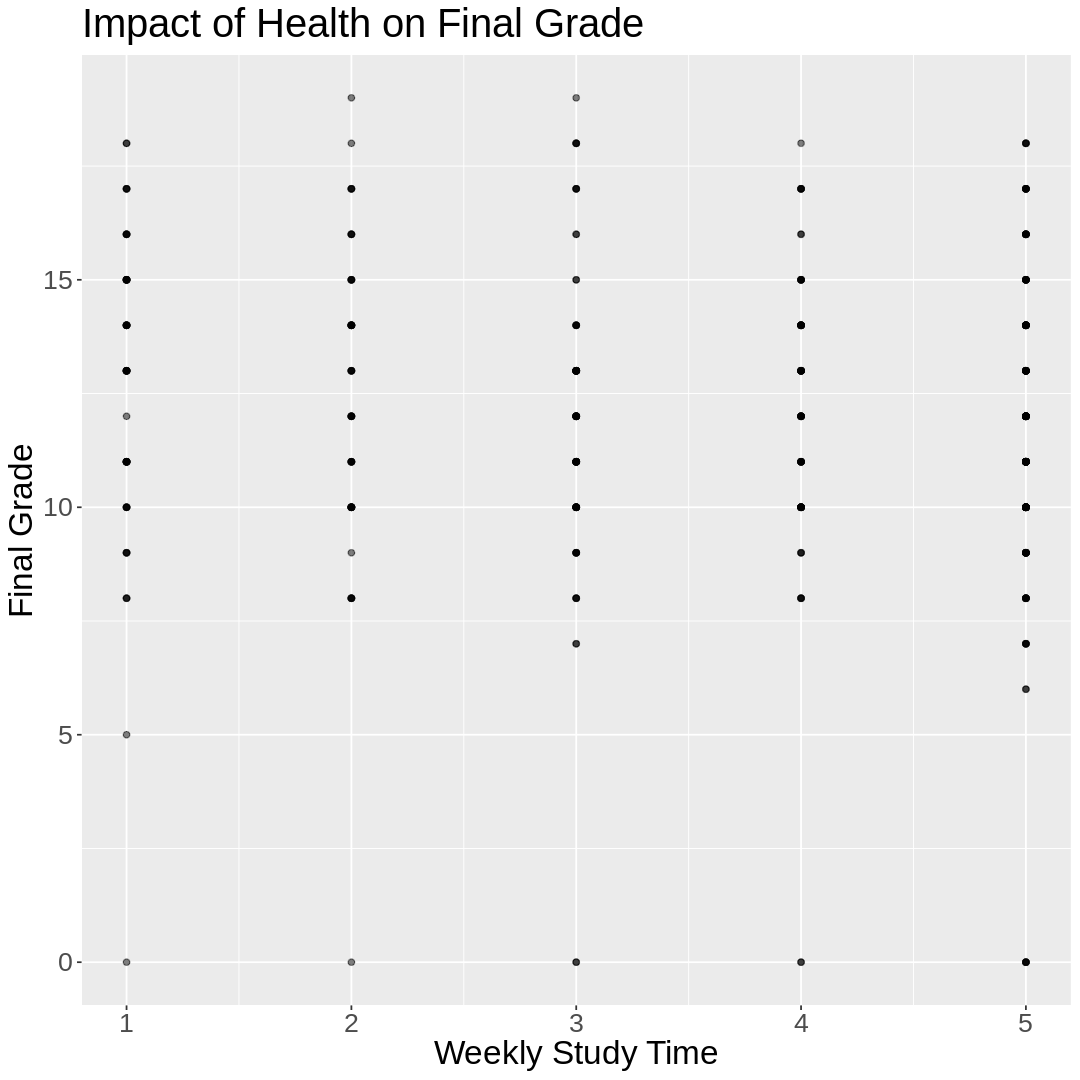

In [32]:
health_plot <- ggplot(student_train, aes(x = health, y = G3)) + 
  geom_point(alpha = 0.5) + 
  xlab("Weekly Study Time") +
  ylab("Final Grade") + 
    labs (title = "Impact of Health on Final Grade") +
theme(text = element_text(size=20)) 

health_plot

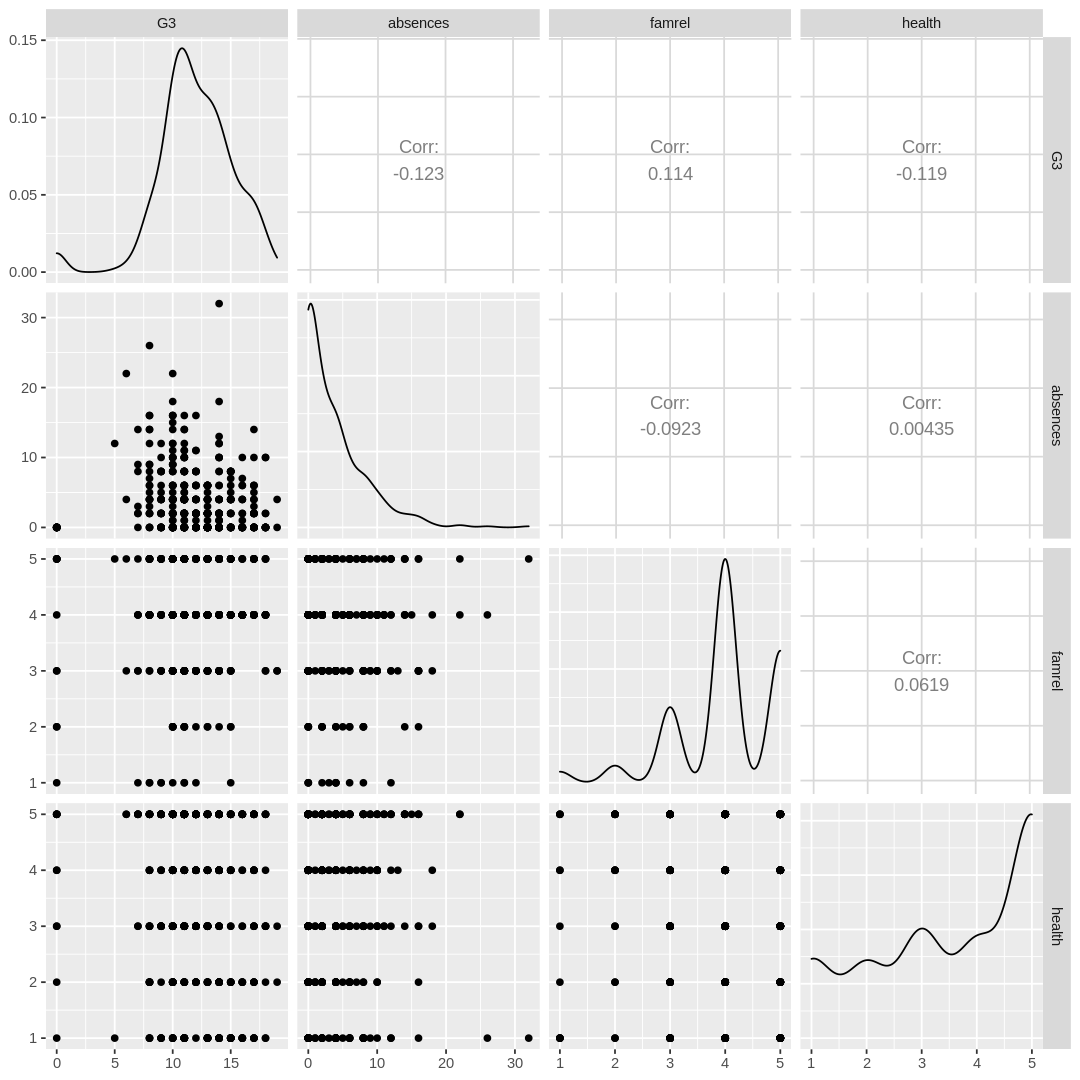

In [43]:
plot_pairs <- student_train %>%
  select(G3, absences, famrel, health) %>%
  ggpairs()
plot_pairs

Here, we should also explain our choice of using a k-nn regression model for analysis instead of a linear regression model. Perhaps this could be because of the above scatterplots not indicating a clear linear relationship, as well as the low correlation coefficients seen above.

In [46]:
#k-nn regression with first predictor, absences

student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

absences_recipe <- recipe(G3 ~ absences, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

student_vfold <- vfold_cv(student_train, v = 5, strata = G3)

absences_wkflw <- workflow() %>%
  add_recipe(absences_recipe) %>%
  add_model(student_spec)

In [18]:
gridvals <- tibble(neighbors = seq(1, 200))

absences_results <- absences_wkflw %>%
  tune_grid(resamples = student_vfold, grid = gridvals) %>%
  collect_metrics()

absences_min <- absences_results %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean))
absences_min

#this indicates k with the lowest rmse on the basis of cross-validation and tuning

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
29,rmse,standard,3.227304,5,0.245183,Model029


In [19]:
absences_kmin <- absences_min %>% pull(neighbors)

absences_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = absences_kmin) %>%
  set_engine("kknn") %>%
  set_mode("regression")

absences_fit <- workflow() %>%
  add_recipe(absences_recipe) %>%
  add_model(absences_spec) %>%
  fit(data = student_train)

absences_summary <- absences_fit %>%
  predict(student_test) %>%
  bind_cols(student_test) %>%
  metrics(truth = G3, estimate = .pred)
absences_summary

# rmspe with testing data, with chosen k

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.1787065398
rsq,standard,0.0008774348
mae,standard,2.3367875648


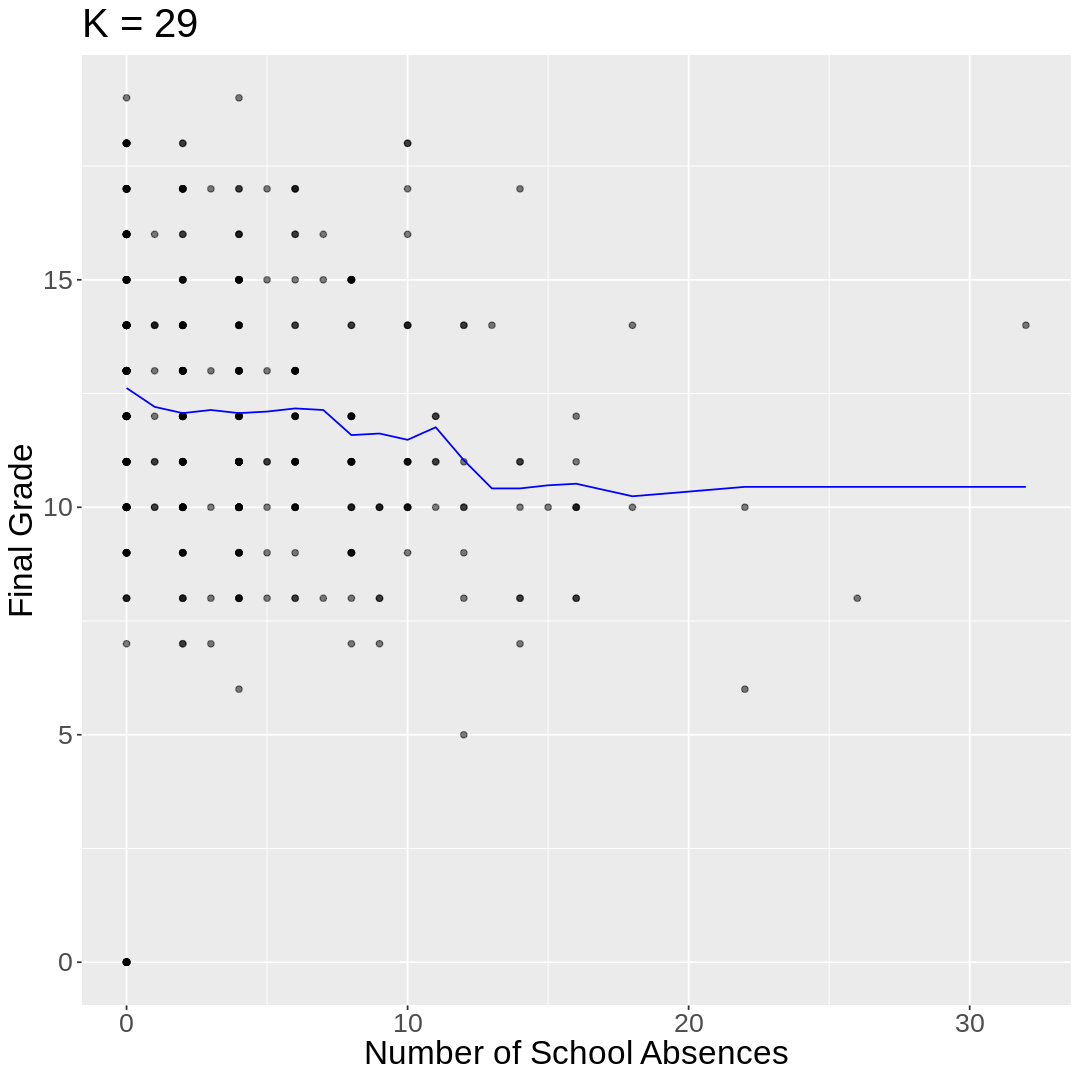

In [33]:
absences_preds <- absences_fit %>%
  predict(student_train) %>%
  bind_cols(student_train)

absences_plot <- ggplot(absences_preds, aes(x = absences, y = G3)) +
  geom_point(alpha = 0.5) +
  xlab("Number of School Absences") +
  ylab("Final Grade") +
  geom_line(data = absences_preds, aes(x = absences, y = .pred), color = "blue") +
  ggtitle(paste0("K = ", absences_kmin)) +
theme(text = element_text(size=20)) 

absences_plot

# scatterplot with k-nn regression line

In [21]:
# repeat of k-nn regression analysis with second predictor, quality of family relationships

famrel_recipe <- recipe(G3 ~ famrel, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

famrel_wkflw <- workflow() %>%
  add_recipe(famrel_recipe) %>%
  add_model(student_spec)

In [22]:
famrel_results <- famrel_wkflw %>%
  tune_grid(resamples = student_vfold, grid = gridvals) %>%
  collect_metrics()

famrel_min <- famrel_results %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean))
famrel_min


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
91,rmse,standard,3.203234,5,0.2237975,Model091


In [23]:
famrel_kmin <- famrel_min %>% pull(neighbors)

famrel_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = famrel_kmin) %>%
  set_engine("kknn") %>%
  set_mode("regression")

famrel_fit <- workflow() %>%
  add_recipe(famrel_recipe) %>%
  add_model(famrel_spec) %>%
  fit(data = student_train)

famrel_summary <- famrel_fit %>%
  predict(student_test) %>%
  bind_cols(student_test) %>%
  metrics(truth = G3, estimate = .pred)
famrel_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.18103110
rsq,standard,0.00239548
mae,standard,2.34732107


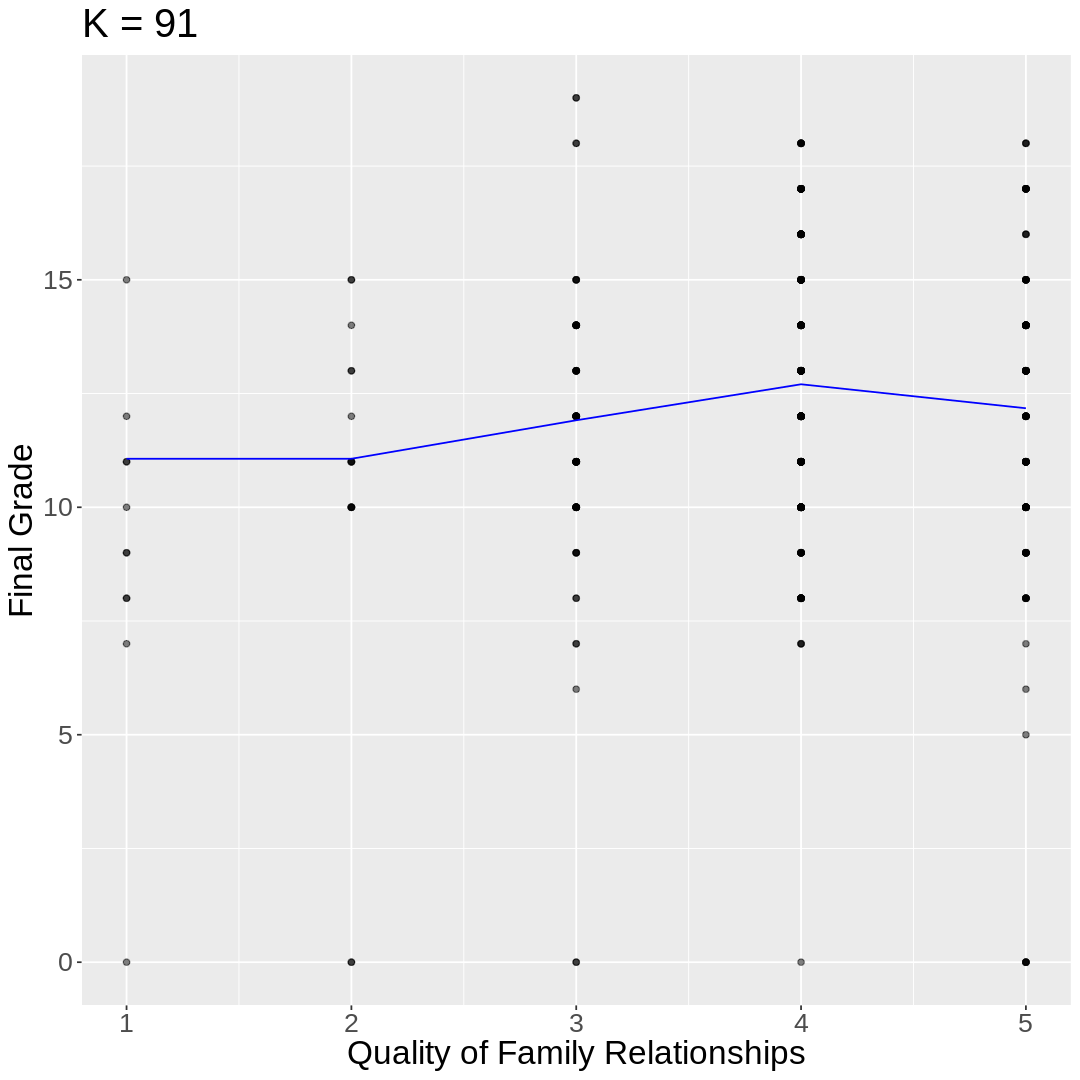

In [34]:
famrel_preds <- famrel_fit %>%
  predict(student_train) %>%
  bind_cols(student_train)

famrel_plot <- ggplot(famrel_preds, aes(x = famrel, y = G3)) +
  geom_point(alpha = 0.5) +
  xlab("Quality of Family Relationships") +
  ylab("Final Grade") +
  geom_line(data = famrel_preds, aes(x = famrel, y = .pred), color = "blue") +
  ggtitle(paste0("K = ", famrel_kmin)) +
theme(text = element_text(size=20)) 
famrel_plot

In [25]:
# repeat of k-nn analysis with third predictor, health

health_recipe <- recipe(G3 ~ health, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

health_wkflw <- workflow() %>%
  add_recipe(health_recipe) %>%
  add_model(student_spec)

In [26]:
health_results <- health_wkflw %>%
  tune_grid(resamples = student_vfold, grid = gridvals) %>%
  collect_metrics()

health_min <- health_results %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean))
health_min


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
114,rmse,standard,3.227498,5,0.2356295,Model114


In [27]:
health_kmin <- health_min %>% pull(neighbors)

health_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = health_kmin) %>%
  set_engine("kknn") %>%
  set_mode("regression")

health_fit <- workflow() %>%
  add_recipe(health_recipe) %>%
  add_model(health_spec) %>%
  fit(data = student_train)

health_summary <- health_fit %>%
  predict(student_test) %>%
  bind_cols(student_test) %>%
  metrics(truth = G3, estimate = .pred)
health_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.130846181
rsq,standard,0.004066698
mae,standard,2.327379329


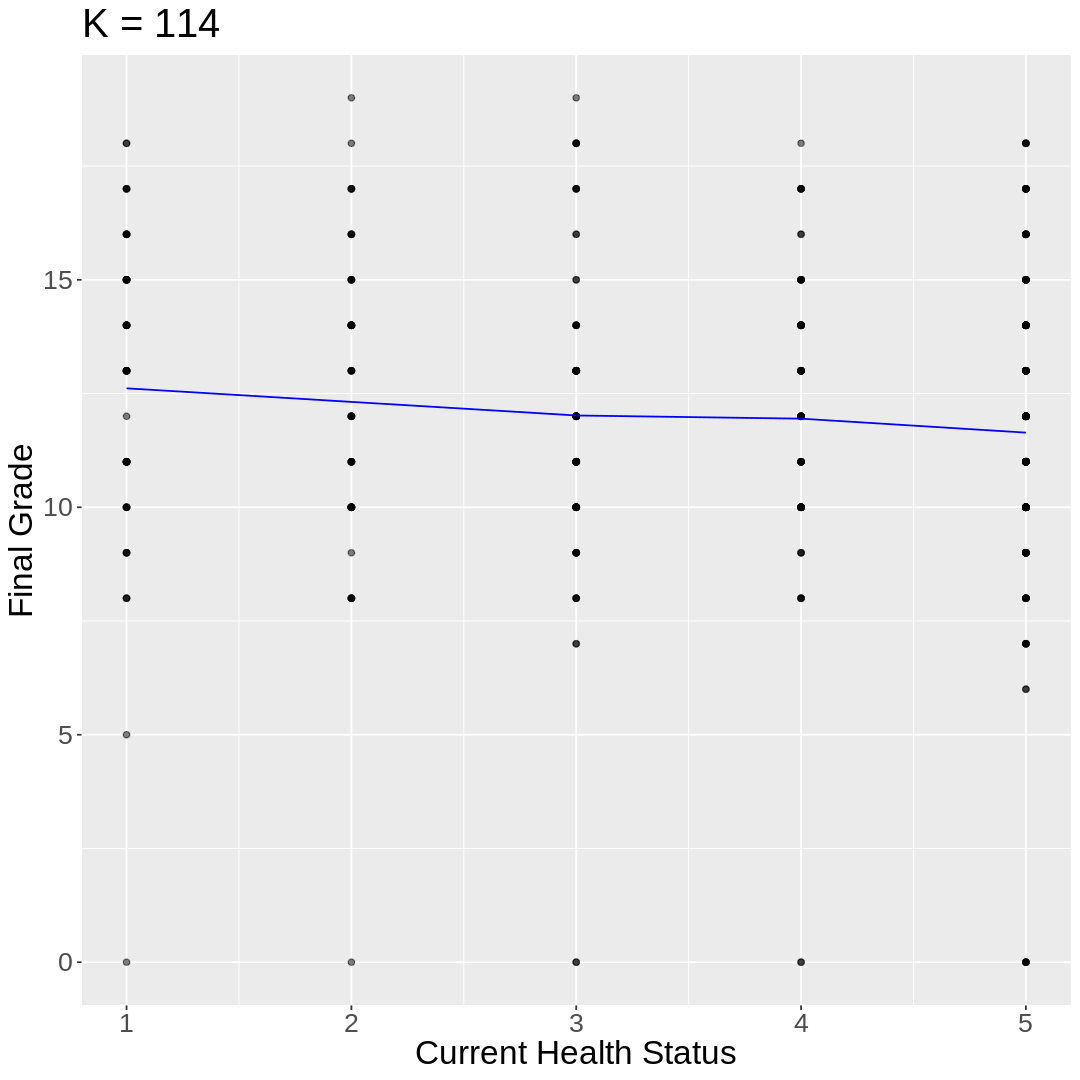

In [35]:
health_preds <- health_fit %>%
  predict(student_train) %>%
  bind_cols(student_train)

health_plot <- ggplot(health_preds, aes(x = health, y = G3)) +
  geom_point(alpha = 0.5) +
  xlab("Current Health Status") +
  ylab("Final Grade") +
  geom_line(data = health_preds, aes(x = health, y = .pred), color = "blue") +
  ggtitle(paste0("K = ", health_kmin)) +
theme(text = element_text(size=20)) 
health_plot

In [36]:
# add a multivariate regression model, with all three predictors, and compare that to the individual models to see if it is better

In [44]:
student_recipe <- recipe(G3 ~ absences + famrel + health, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

In [48]:
student_k <- workflow() %>%
  add_recipe(student_recipe) %>%
  add_model(student_spec) %>%
  tune_grid(student_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean)) %>%
  pull(neighbors)
student_k

[1] 19

In [49]:
student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = student_k) %>%
  set_engine("kknn") %>%
  set_mode("regression")

student_fit <- workflow() %>%
  add_recipe(student_recipe) %>%
  add_model(student_spec) %>%
  fit(data = student_train)

student_preds <- student_fit %>%
  predict(student_test) %>%
  bind_cols(student_test)

student_mets <- metrics(student_preds, truth = G3, estimate = .pred)
student_mets

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.226700197
rsq,standard,0.004185871
mae,standard,2.407144805


## Discussion 

**Summary**

Upon prelimary analysis of each scatter plot there are does not seem to be any significant relationships between the predictors and target variables in the data, this could possibly be due to the fact that within these scatterplots many of the data points are stacked on top of one another caused by many students having the same final grades and circumstances.  With the use of K-nearest neighbor regression we find that each regression model provides a similar RMSPE of around 3 which makes it difficult to definitively choose a predictor which would have the best effect on grades. To solve this we look at the trends that are present within the K-nn regression plots. 
- By plotting the final grades in relation to the number of absences there is a significant drop in the final grades once the number of absences is 10 and over, suggesting that a relatively high amount of absences from school will result in lower grades. 
- Comparing final grades and quality of family relationships (on a scale of 1-5) there is a steady rise from relationships rated 2 to 4 which indicated that students with well maintained family relationships have higher grades.
- Finally with further analysis, there is virtually no trend present in the relationship between final grades and a students health status (on a scale of 1-5), which could mean that a students individual health has no significant effect on a students academic performance.

However, due to a relatively high k value for all the predictors, this could result in underfitting of the data, given that there is low variance and high bias in the data. This means that since the K-nn regression model has so many data points to consider, if one of those points were to change it would have virtually no effect on the model. The use of K-nn regression provides a simple and easy way to interpret the data, which works well for non-linear relationships like this data set, however it does not provide much information about insights beyond the training data set, limiting our predictions.

**Expected Outcomes**

We expected to see a significant effect on students grades based upon their family relationships and the amount of time absent from school which is supported by the negative influence on grades due to absences from school and the positive influence on grades due to higher family relatioships. We also expected to find a much more prominent effect on final grades due to the health status of the students such as higher grades from students who have relatively better health status rating compared to the those with a lower rating, however no effect was shown. 

**How could this impact students in the future**

With the help of the data this study provided, students and educators have some insight into certain sources that could help students obtain higher grades. For example, students that are more frequently present in class are likely to achieve higher academic scores. Therefore students should try to miss as little school as possible if they can, hopefully meaning less students would skip class, resulting in higher attendance rates. Teachers should also use this information to encourage students as much as they can to also encourage higher grades. Although schools or even students typically cannot influence students family relationships, educators and educational facilities should be sensitive of those with lower rated family relations and take into account the possible effect this could have to impeed the student's ability to learn. These facilities should then offer support systems to elevate the resources students could use to learn, perhaps making tutoring services readily available within the school itself to provide students with a safe and quiet area to access extra help.

**Future Inquiries**

- What is the relative importance of each factor in influencing student performance?
- To what extent can manipulation of these factors or provided resources lead to changes in a student's performance?
- Are there other factors, beyond the ones we investigated, which play a large role in student performance?


### References
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references)
- Make sure to cite the source of your data as well

This is the citation for the source: P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

https://archive.ics.uci.edu/ml/datasets/Student+Performance


**Potential sources:**
- https://inservice.ascd.org/exploring-learning-and-health-what-influences-a-childs-ability-to-learn/
- https://www.education.vic.gov.au/school/teachers/teachingresources/Pages/identifying-high-ability-students.aspx
- https://www.oecd.org/site/educeri21st/40600533.pdf (good source)
- https://owlcation.com/academia/Factors-that-affect-Student-Learning